Lien important : https://www.kaggle.com/code/startupsci/titanic-data-science-solutions
https://www.kaggle.com/code/nadintamer/titanic-survival-predictions-beginner/notebook


# Titanic Survival Predictions
Première analyse exploratoire des données sur les données du Titanic, disponible à cette adresse : https://www.kaggle.com/competitions/titanic/overview

Découverte des différentes méthodes de machine learning, ainsi que de la sélection de méthode pour prédire au mieux les personnes qui ont survécu au naufrage du Titanic. 

## Librairies

La première chose à faire est d'importer les différentes librairies important à notre analyse. 

In [47]:
# Data analysis
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
# Seaborn parameters
sns.set(rc={'figure.figsize':(12,8)})
sns.set_palette("tab10")
sns.set_style("white")

## Importation et exploration des données
La première chose à faire quand on a des données qu'on ne connait pas (ce n'est pas nous qui les avons obtenues) est d'exploré le jeu de données afin d'en apprendre plus sur celui-ci.

In [49]:
# Importation des données train - test
test = pd.read_csv("../data/test.csv")
train = pd.read_csv("../data/train.csv")

# Rapide visualisation des données
display(test.head())            # visualisation des 5 premières lignes 
print(test.shape)             # nombre de lignes et colonnes

display(train.head())
print(train.shape)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


(418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


(891, 12)


On constate que les données `test` n'ont pas de colonne **Survived**, ce qui est logique vu qu'on souhaite testé sur ce dataframe la probabilité de survi des individus. \
À partir de maintenant, nous allons nous consacrer sur le jeu de donnée `train` jusqu'à la création d'un modèle de machine learning.

In [50]:
# Vue d'ensemble des données de train
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.00,0.38,2.31,NaN,NaN,29.70,0.52,0.38,NaN,32.20,NaN,NaN
std,257.35,0.49,0.84,NaN,NaN,14.53,1.10,0.81,NaN,49.69,NaN,NaN
min,1.00,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN,NaN
25%,223.50,0.00,2.00,NaN,NaN,20.12,0.00,0.00,NaN,7.91,NaN,NaN
50%,446.00,0.00,3.00,NaN,NaN,28.00,0.00,0.00,NaN,14.45,NaN,NaN
75%,668.50,1.00,3.00,NaN,NaN,38.00,1.00,0.00,NaN,31.00,NaN,NaN


Il est important de regarder dans l'ensemble les données. Voir si des données  anormales peuvent apparaitre. \
Par exemple, regarder si des Age peuvent être inférieurs à 0. Cela n'est pas possible. Pour l'instant, aucune donnée n'a l'air d'être anormale. Néanmoins, on se rend compte que quelques variables n'ont pas 891 valeurs (Cabin, Age, Embarked). On regardera un peu mieux en détails par la suite ces variables.

# Column Descriptions : 
- `PassengerId`: ID unique pour chaque passager du Titanic. 
- `Survived`: Survival | 0 = No, 1 = Yes
- `Pclass` : Ticket class | 1st = Upper, 2nd = Middle, 3rd = Lower
- `Name`: First Name & Last Name + Grade
- `Sex`: Sex of the person
- `Age`: Age
- `SibSp`: # of siblings (brother, sister etc...) / spouse (husband, wife) aboard the Titanic
- `Parch`: # of parents / children aboard the Titanic
- `Ticket`: Ticket number
- `Fare`: Passenger Fare
- `Cabin Number`: Cambin number
- `Embarked`: port of Embarkation

In [51]:
# Data types
train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
# Or
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Il peut être intéressant maintenant que nous avons une vue d'ensemble des données, de regarder les données manquantes.

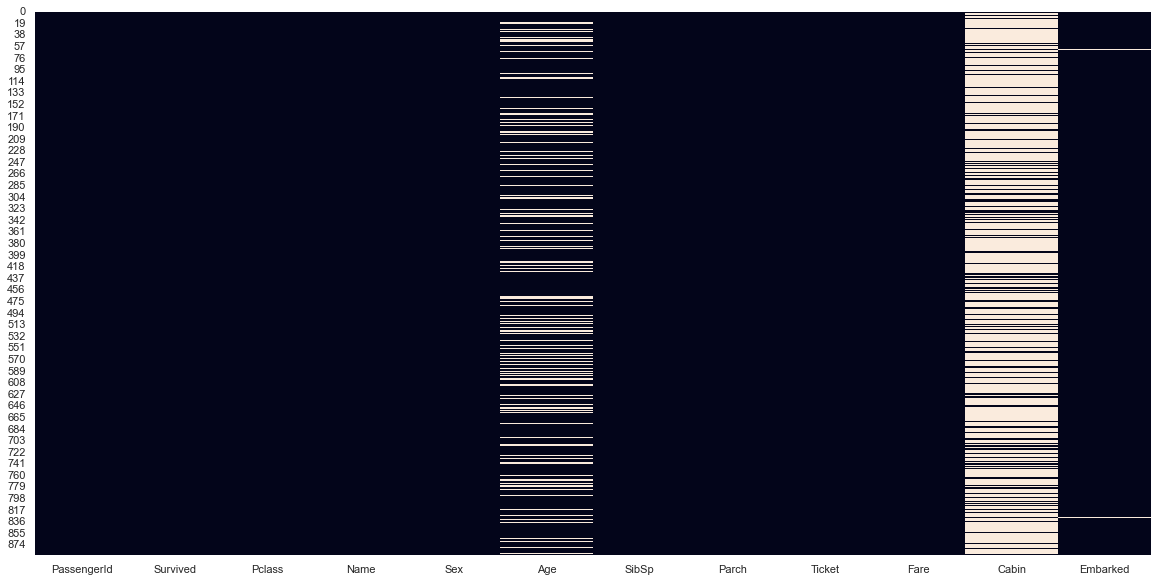

In [53]:
# Missing values
plt.figure(figsize=(20,10))
sns.heatmap(train.isna(), cbar = False)
plt.show()

Comme dit plus haut, on se rend compte que les variables Age, Cabin et Embarked ont des données manquantes (traits blancs sur le graphique). Pour notre modèle, il ne faudra aucune donnée manquantes, de ce fait, il faudra soit supprimé des lignes, soit trouvé un moyen d'attribué des valeurs en fonction des autres passagers.

In [54]:
# Percentage de valeurs manquantes
(train.isna().sum()/train.shape[0]).sort_values(ascending=False)

Cabin         0.77
Age           0.20
Embarked      0.00
PassengerId   0.00
Survived      0.00
Pclass        0.00
Name          0.00
Sex           0.00
SibSp         0.00
Parch         0.00
Ticket        0.00
Fare          0.00
dtype: float64

Qu'avons nous observé? 
- Il y a 891 passagers dans le dataset train;
- Il manque environ 77% de valeurs pour la variable Cabin, ce qui est assez important. Il faudra donc réfléchir si on garde cette variable ou si on la supprime tout simplement;
- Il manque environ 19% de valeurs pour la variable Age, qui est une variable importante, de ce fait, il faut trouver un moyen pour compléter les valeurs manquantes;
- Il manque 0.22% de valeurs pour la variable Embarked, ce qui est négligeable, donc on lui attribuera une valeur prédéfini. 

## Visualisation des données
Il est important d'avoir une vue d'ensemble de nos données. La représentation graphique est ce qu'il y a de mieux pour voir cette vue d'ensemble. \
À chaque fois, on comparera les données avec la variable qui nous est importante : `Survived`. 

### Variable Pclass
Rappel : Ticket class | 1st = Upper, 2nd = Middle, 3rd = Lower

In [55]:
def percentage_survived(data, features, condition):
    """
    Calculates the survival rate according to another variable with its condition.

    data = dataframe containing the data with the different variables, including the 'Survived' variable
    features = variable whose survival rate we want to know
    condition = the condition of the chosen variable, for example with a dummy variable : 0, 1, 2 etc...
    """

    results = round(data["Survived"][data[features] == condition].value_counts(normalize = True)[1]*100,2)

    return results

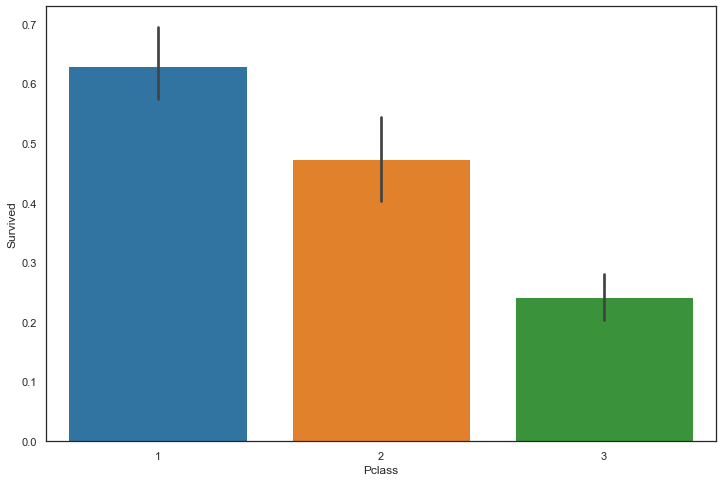

Percentage of Pclass = 1 who survived : 62.96%
Percentage of Pclass = 2 who survived : 47.28%
Percentage of Pclass = 3 who survived : 24.24%


In [56]:
# Barplot - Pclass
sns.barplot(data = train, x = "Pclass", y="Survived")
plt.show()

# Percentages of people who have survived through Pclass
print(f"Percentage of Pclass = 1 who survived : {percentage_survived(train, 'Pclass', 1)}%")
print(f"Percentage of Pclass = 2 who survived : {percentage_survived(train, 'Pclass', 2)}%")
print(f"Percentage of Pclass = 3 who survived : {percentage_survived(train, 'Pclass', 3)}%")

On constate que les personnes ayant une Pclass plus importante, ont également un taux de survie plus important.
### Variable Sex
Sex of the person

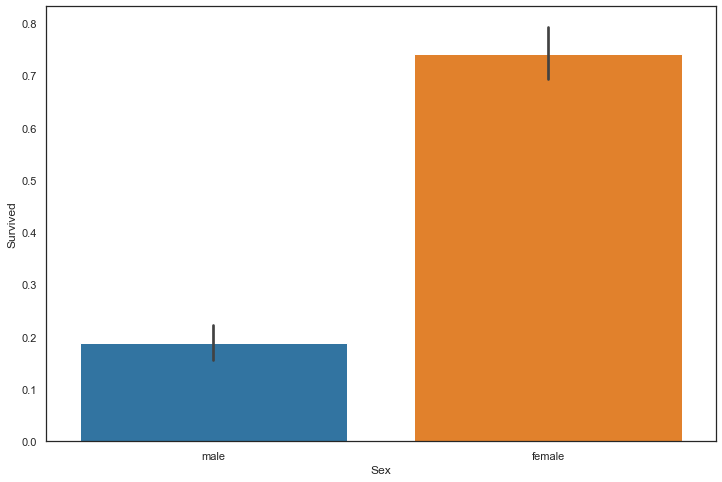

Percentage of females who survived : 74.2%
Percentage of males who survived : 18.89%


In [57]:
# Barplot - Sex
sns.barplot(data = train, x = "Sex", y="Survived")
plt.show()

# Percentages of people who have survived through Pclass
print(f"Percentage of females who survived : {percentage_survived(train, 'Sex', 'female')}%")
print(f"Percentage of males who survived : {percentage_survived(train, 'Sex', 'male')}%")

Les femmes ont une chance de survie plus importantes que les hommes. De ce fait, le Sex devient une variable essentielle dans notre prédiction

### Variable SipSp
\# of siblings (brother, sister etc...) / spouse (husband, wife) aboard the Titanic

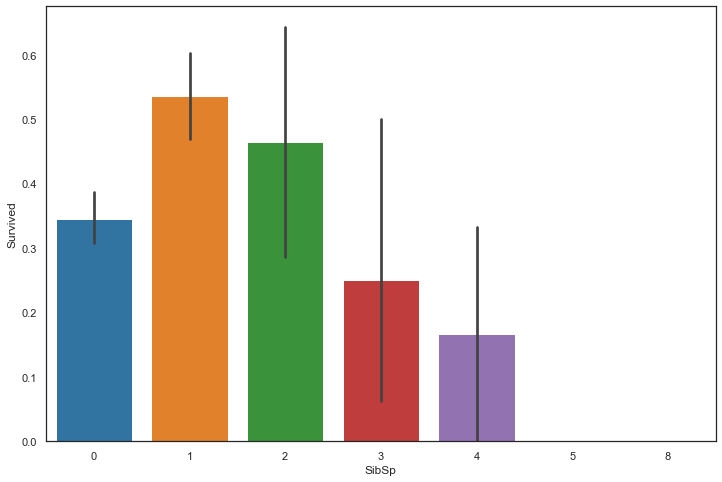

Percentage of SibSp = 0 who survived : 34.54%
Percentage of SibSp = 1 who survived : 53.59%
Percentage of SibSp = 2 who survived : 46.43%
Percentage of SibSp = 3 who survived : 25.0%
Percentage of SibSp = 4 who survived : 16.67%


In [58]:
# Barplot - Sex
sns.barplot(data = train, x = "SibSp", y="Survived")
plt.show()

# Percentages of people who have survived through Pclass
print(f"Percentage of SibSp = 0 who survived : {percentage_survived(train, 'SibSp', 0)}%")
print(f"Percentage of SibSp = 1 who survived : {percentage_survived(train, 'SibSp', 1)}%")
print(f"Percentage of SibSp = 2 who survived : {percentage_survived(train, 'SibSp', 2)}%")
print(f"Percentage of SibSp = 3 who survived : {percentage_survived(train, 'SibSp', 3)}%")
print(f"Percentage of SibSp = 4 who survived : {percentage_survived(train, 'SibSp', 4)}%")

On constate que pour avoir un taux de survi plus important, il faudrait 1 voir 2 siblings ou spouses à bord. Néanmoins, le taux de survie se dégrage si on commence à en avoir plus de deux 2. 

### Variable Parch
\# of parents / children aboard the Titanic

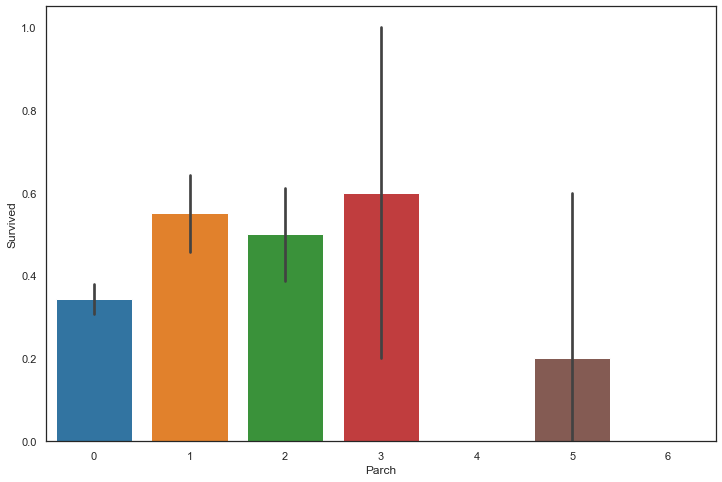

Percentage of Parch = 0 who survived : 34.37%
Percentage of Parch = 1 who survived : 55.08%
Percentage of Parch = 2 who survived : 50.0%
Percentage of Parch = 3 who survived : 60.0%
Percentage of Parch = 5 who survived : 20.0%


In [59]:
# Barplot - Sex
sns.barplot(data = train, x = "Parch", y="Survived")
plt.show()

# Percentages of people who have survived through Pclass
print(f"Percentage of Parch = 0 who survived : {percentage_survived(train, 'Parch', 0)}%")
print(f"Percentage of Parch = 1 who survived : {percentage_survived(train, 'Parch', 1)}%")
print(f"Percentage of Parch = 2 who survived : {percentage_survived(train, 'Parch', 2)}%")
print(f"Percentage of Parch = 3 who survived : {percentage_survived(train, 'Parch', 3)}%")
print(f"Percentage of Parch = 5 who survived : {percentage_survived(train, 'Parch', 5)}%")

Les personnes qui voyagent seules ont moins de chance de survivre que les personnes ayant 1 à 3 parents ou enfants. De plus, les personnes qui ont moins de 4 parents et/ou enfants à bord ont un taux plus important de survi que les personnes qui en ont 4 ou plus.

### Variable Embarked
port of Embarkation

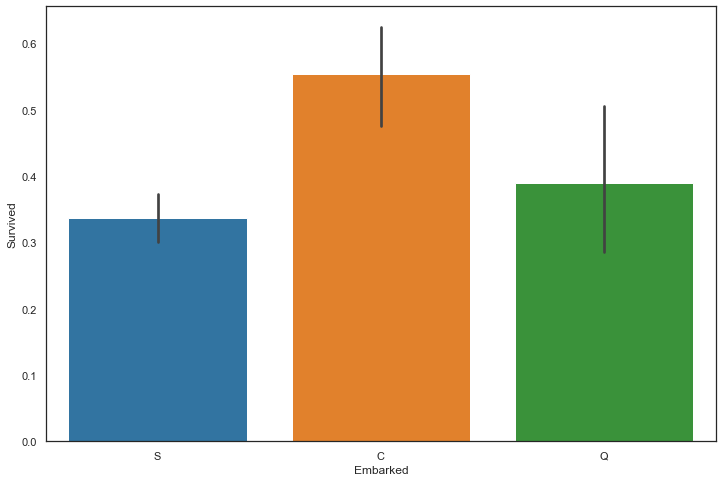

Percentage of Embarked = S who survived : 33.7%
Percentage of Embarked = C who survived : 55.36%
Percentage of Embarked = Q who survived : 38.96%


In [60]:
# Barplot - Sex
sns.barplot(data = train, x = "Embarked", y="Survived")
plt.show()

# Percentages of people who have survived through Pclass
print(f"Percentage of Embarked = S who survived : {percentage_survived(train, 'Embarked', 'S')}%")
print(f"Percentage of Embarked = C who survived : {percentage_survived(train, 'Embarked', 'C')}%")
print(f"Percentage of Embarked = Q who survived : {percentage_survived(train, 'Embarked', 'Q')}%")

Les personnes qui ont embarquées à Cherbourg (C) ont le plus haut taux de survie que les personnes qui ont embarquées à Southampton (S) ou Queenstown (Q)

### Variable Age
= Age

Étant donné que l'Age est une variable continue, on va devoir créer des catégories pour des tranches d'âge. De plus, étant donné qu'il manque des données dans cette variable, on va créer une catégorie pour les perosnnes dont on connait pas l'âge. 

Pour les catégories d'âge : 

- Baby : 0-4 years;
- Child : 5-12 years;
- Teen : 13-18 years;
- Adult : 19-35 years;
- Middle Age Adult : 36-59years;
- Senior : 60+

Pour cette analyse, on va copier le dataframe `train` pour ne pas effectuer de modification dessus pour le moment.

In [61]:
# Transform age into categories
train_2 = train.copy()
train_2["Age"] = train_2["Age"].fillna(-1)

age_bins = [-2,0,5,12,18,35,60,np.inf]
labels = ["Unknown", "Baby", "Child", "Teen", "Adult", "Middle Adult", "Senior"]
train_2["AgeGroup"] = pd.cut(train_2["Age"], age_bins, labels = labels)

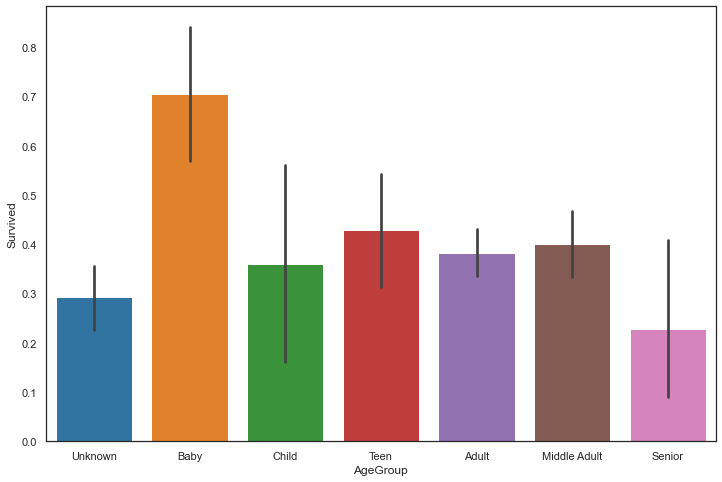

In [62]:
# Barplot - Sex
sns.barplot(data = train_2, x = "AgeGroup", y="Survived")
plt.show()

On constate que le taux de survie le plus important est pour les bébés avec plus de 70% de taux de survie. 

Maintenant qu'on a eu un aperçu du dataset, il faut qu'on nettoie nos données pour les préparer à notre modèle. On va devoir supprimer les variables inutiles, remplir les données manquantes. 

Pour notre modèle, on aura besoin que de valeurs catégorielles. Aucune variable en string ou continues, ne devra être accepté.

## Nettoyage des données

In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [64]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.00,0.38,2.31,NaN,NaN,29.70,0.52,0.38,NaN,32.20,NaN,NaN
std,257.35,0.49,0.84,NaN,NaN,14.53,1.10,0.81,NaN,49.69,NaN,NaN
min,1.00,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN,NaN
25%,223.50,0.00,2.00,NaN,NaN,20.12,0.00,0.00,NaN,7.91,NaN,NaN
50%,446.00,0.00,3.00,NaN,NaN,28.00,0.00,0.00,NaN,14.45,NaN,NaN
75%,668.50,1.00,3.00,NaN,NaN,38.00,1.00,0.00,NaN,31.00,NaN,NaN


On peut supprimer les variables : 
- Cabin;
- Ticket;

Ce sont des variables qui nous seront d'aucune utilité dans notre analyse.

In [65]:
# Create a combine dataset with train and test
combine = [train, test]

for dataset in combine:
    dataset.drop(["Ticket","Cabin"], axis=1, inplace=True)

## Name Feature

Il peut être intéressant de récupérer le titre dans chaque nom. Ainsi, on pourra réalisé un dummy variable avec les différents titres.

On va réaliser les modifications sur les deux dataframes à la fois (train et test).

In [66]:
for dataset in combine:
    dataset["Title"] = dataset["Name"].str.extract('([A-Za-z]+)\.', expand=False)

The RegEx pattern `(\w+\.)` matches the first word which ends with a dot character within Name feature. The `expand=False` flag returns a DataFrame.

In [67]:
pd.crosstab(train["Title"],train["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [68]:
(train["Title"].value_counts() < 10)

Mr          False
Miss        False
Mrs         False
Master      False
Dr           True
Rev          True
Mlle         True
Major        True
Col          True
Countess     True
Capt         True
Ms           True
Sir          True
Lady         True
Mme          True
Don          True
Jonkheer     True
Name: Title, dtype: bool

`'Dr', 'Rev', 'Mlle', 'Major', 'Col', 'Countess', 'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer'` sont les variables qui apparaissent moins de 10 fois dans le dataset. 

À l'intérieur de ces variables on peut rassembler entre elles quelques données : 
- `Mlle, Ms` qui peuvent être assigné à Miss. 
- `Mme` par `Mrs`
- `Countess, Sir, Lady` par une même variable définissant la royauté par exemple. 

In [69]:
# Replace titles with common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace(['Mlle', "Ms"], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

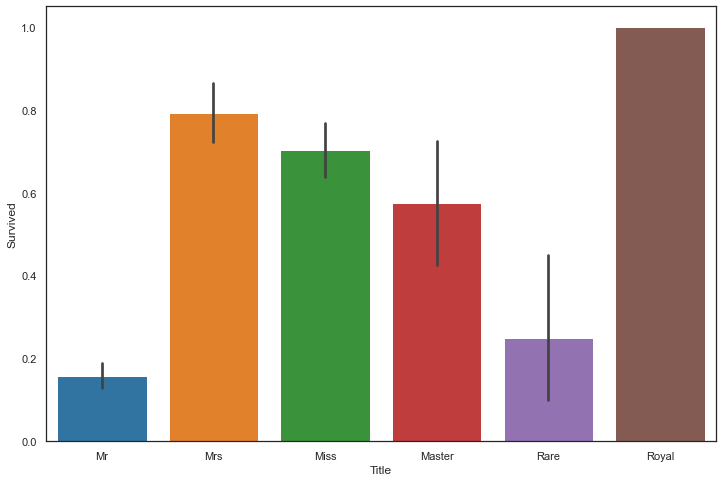

In [70]:
sns.barplot(data = train, x = "Title", y="Survived")
plt.show()

In [71]:
# Create a dummy variable
title_dummy = {"Mr": 1, "Mrs": 2, "Miss": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_dummy)
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset.drop("Name", axis = 1, inplace=True)

### Sex features
Converting sex, with male = 0 and female = 1

In [72]:
for dataset in combine:
    dataset["Sex"] = dataset["Sex"].map({"male":0, "female": 1}).astype(int)

In [73]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.00,1,0,7.25,S,1
1,2,1,1,1,38.00,1,0,71.28,C,2
2,3,1,3,1,26.00,0,0,7.92,S,3
3,4,1,1,1,35.00,1,0,53.10,S,2
4,5,0,3,0,35.00,0,0,8.05,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.00,0,0,13.00,S,6
887,888,1,1,1,19.00,0,0,30.00,S,3
888,889,0,3,1,NaN,1,2,23.45,S,3
889,890,1,1,0,26.00,0,0,30.00,C,1


### Age features
Missing age with median age group for each title

In [74]:
guess_age = np.zeros(6)

In [75]:
for dataset in combine:        
    for i in range(0,6):
        guess_median = dataset[dataset["Title"]==i+1]['Age'].dropna().median()

        guess_age[i] = guess_median

    for i in range(0,6):
        dataset.loc[(dataset["Age"].isnull()) & (dataset["Title"] == i+1),"Age"] = guess_age[i]

In [76]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Title          0
dtype: int64

In [77]:
# Réutilisation du découpage réalisé plus haut
age_mapping = {'Baby': 1, 'Child': 2, 'Teen': 3, 'Adult': 4, 'Middle Adult': 5, 'Senior': 6}

for dataset in combine:
    dataset["AgeGroup"] = pd.cut(dataset["Age"], age_bins, labels = labels)
    dataset["Age"] = dataset["AgeGroup"].map(age_mapping).astype(int)
    dataset.drop("AgeGroup", axis = 1, inplace=True)

### Embarked Features

In [78]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

S est la plus précente, donc on va fillna par S

In [79]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}

for dataset in combine:
    dataset["Embarked"].fillna("S", inplace=True)
    dataset["Embarked"] = dataset["Embarked"].map(embarked_mapping) 

In [80]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,4,1,0,7.25,1,1
1,2,1,1,1,5,1,0,71.28,2,2
2,3,1,3,1,4,0,0,7.92,1,3
3,4,1,1,1,4,1,0,53.10,1,2
4,5,0,3,0,4,0,0,8.05,1,1


### Fare features

In [81]:
# Fill NaN values by Median
for dataset in combine:
    dataset["Fare"].fillna(dataset["Fare"].dropna().median(), inplace=True)
    dataset["Fare"] = pd.qcut(dataset["Fare"], 4, labels=[1,2,3,4])

In [82]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,4,1,0,1,1,1
1,2,1,1,1,5,1,0,4,2,2
2,3,1,3,1,4,0,0,2,1,3
3,4,1,1,1,4,1,0,4,1,2
4,5,0,3,0,4,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,4,0,0,2,1,6
887,888,1,1,1,4,0,0,3,1,3
888,889,0,3,1,4,1,2,3,1,3
889,890,1,1,0,4,0,0,3,2,1


### SibSp & Parch Features

Créer une variable est tout seul ou n'est pas tout seul

In [83]:
for dataset in combine:
    dataset["SibSp_Parch"] = dataset['SibSp'] + dataset['Parch']

    dataset["Alone"] = 0
    dataset.loc[dataset["SibSp_Parch"]==0,"Alone"] = 1

    dataset.drop(["SibSp","Parch","SibSp_Parch"], axis = 1, inplace = True)

In [84]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,1,0,3,0,4,1,1,1,0
1,2,1,1,1,5,4,2,2,0
2,3,1,3,1,4,2,1,3,1
3,4,1,1,1,4,4,1,2,0
4,5,0,3,0,4,2,1,1,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,4,2,1,6,1
887,888,1,1,1,4,3,1,3,1
888,889,0,3,1,4,3,1,3,0
889,890,1,1,0,4,3,2,1,1


## Model, predict and solve
Use differents types of model :
- Logistic Regression ;
- KNN ;
- Random Forest ;
- Support Vector Machines ; 
- Decision Tree ; 

In [107]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [91]:
X_train = train.drop(["PassengerId","Survived"], axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

**Logistic Regression**: can be used to model the probability of a passenger surviving or not in the Titanic disaster based on their characteristics such as age, fare, socio-economic status, etc. The coefficients of the logistic regression are estimated based on historical data of known passengers, and can then be used to predict the survival probability of a passenger based on their characteristics.

In [99]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
accuray_logreg = round(logreg.score(X_train, Y_train) * 100, 2)
accuray_logreg

80.47

**KNN (K-Nearest Neighbors)** : is a classification algorithm that makes predictions based on the majority class of the K nearest data points to a given test sample. In the context of the Titanic disaster, KNN can be used to predict the survival or non-survival of a passenger by comparing their characteristics to the K nearest passengers in the historical data, and assigning them the majority class of those K nearest neighbors.

In [100]:
# KNN 
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
accuracy_knn = round(knn.score(X_train, Y_train) * 100, 2)
accuracy_knn

81.03

**Random Forest** : is an ensemble learning algorithm that builds multiple decision trees and combines their predictions to make a final classification decision. In the context of the Titanic disaster, Random Forest can be used to model the survival or non-survival of a passenger by training multiple decision trees on different subsets of the historical data and using the majority vote of the decision trees to make a final prediction for a given test sample. This approach can help to reduce overfitting and improve the overall accuracy of the model.

In [101]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
accuracy_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
accuracy_random_forest

86.98

**SVM  (Support Vector Machine)** : is a supervised learning algorithm that is used for classification tasks by finding a hyperplane that maximally separates the data into different classes. In the context of the Titanic disaster, SVM can be used to predict the survival or non-survival of a passenger by training the algorithm on the historical data and finding the hyperplane that best separates the survivors and non-survivors. The prediction for a given test sample is made based on which side of the hyperplane it falls on.

In [105]:
# Support Vector Machine : 
svc = svm.SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
accuracy_svc = round(svc.score(X_train, Y_train) * 100, 2)
accuracy_svc

82.04

**Decision Tree :** is a tree-based algorithm that can be used for both regression and classification tasks by recursively splitting the data into smaller subgroups based on the values of the features. In the context of the Titanic disaster, a Decision Tree can be used to model the survival or non-survival of a passenger by training the algorithm on the historical data and using the tree to make predictions by following a series of decision rules based on the values of the passenger's characteristics. The prediction is made by reaching a final leaf node of the tree that represents the class label (survived or not).

In [106]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
accurarcy_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
accurarcy_decision_tree

86.98